In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import torch
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time

In [5]:
dataset_path = "../Data/features_30_sec.csv"

data = pd.read_csv(dataset_path)

spectral_features = [
    "chroma_stft_mean", "chroma_stft_var",
    "spectral_centroid_mean", "spectral_centroid_var",
    "rolloff_mean", "rolloff_var"
]
rhythmic_features = ["tempo"]
mfcc_features = [
    "mfcc1_mean", "mfcc1_var",
    "mfcc2_mean", "mfcc2_var",
    "mfcc3_mean", "mfcc3_var"
]

selected_features = spectral_features + rhythmic_features + mfcc_features

X = data[selected_features]
y = data["label"]

# print("Selected Features Shape:", X_selected.shape)
# print("Labels Shape:", y.shape)

# print(X_selected.head())

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Labels Shape:", y_val.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (700, 13)
Validation Features Shape: (150, 13)
Testing Features Shape: (150, 13)
Training Labels Shape: (700,)
Validation Labels Shape: (150,)
Testing Labels Shape: (150,)


In [3]:
def RandomForestModel(n: int):
    randomForest = RandomForestClassifier(n_estimators=n, random_state=42)

    randomForest.fit(X_train, y_train)
    yPred = randomForest.predict(X_val)

    valAccuracy = accuracy_score(y_val, yPred)
    valPrecision = precision_score(y_val, yPred, average='weighted')
    valRecall = recall_score(y_val, yPred, average='weighted')
    valF1 = f1_score(y_val, yPred, average='weighted')
    
    # print("Validation Accuracy:", valAccuracy)

    # print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
    # print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

    yTestPred = randomForest.predict(X_test)
    testAccuracy = accuracy_score(y_test, yTestPred)
    testPrecision = precision_score(y_test, yTestPred, average='weighted')
    testRecall = recall_score(y_test, yTestPred, average='weighted')
    testF1 = f1_score(y_test, yTestPred, average='weighted')
    # print("Test Accuracy:", testAccuracy)

    return round(valAccuracy,4), round(testAccuracy,4), round(valPrecision,4), round(valRecall,4), round(valF1,4), round(testPrecision,4), round(testRecall,4), round(testF1,4)
    

In [25]:
# Sample data
estimators = [25,50,75,100,125,150,175,200,250,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

yValues = {
    "Validation Score" : [],
    "Test Accuracy": [],
    "Validation Precision": [],
    "Validation Recall": [],
    "Validation F1": [],
    "Test Precision": [],
    "Test Recall": [],
    "Test F1": [],
}

for x in estimators:
    start_time = time.perf_counter()  # Start timing

    y1, y2, y3, y4, y5, y6, y7, y8 = (RandomForestModel(x))

    yValues['Validation Score'].append(y1)
    yValues['Test Accuracy'].append(y2)
    yValues['Validation Precision'].append(y3)
    yValues['Validation Recall'].append(y4)
    yValues['Validation F1'].append(y5)
    yValues['Test Precision'].append(y6)
    yValues['Test Recall'].append(y7)
    yValues['Test F1'].append(y8)

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    print(f"N_Estimator: {x} | {round(elapsed_time, 4)}s")

N_Estimator: 25 | 0.2655s
N_Estimator: 50 | 0.2593s
N_Estimator: 75 | 0.3154s
N_Estimator: 100 | 0.5092s
N_Estimator: 125 | 0.5294s
N_Estimator: 150 | 0.8051s
N_Estimator: 175 | 0.7533s
N_Estimator: 200 | 0.7775s
N_Estimator: 250 | 0.98s
N_Estimator: 300 | 1.1674s
N_Estimator: 400 | 1.6854s
N_Estimator: 500 | 1.9934s
N_Estimator: 600 | 2.4322s
N_Estimator: 700 | 2.9261s
N_Estimator: 800 | 3.2857s
N_Estimator: 900 | 3.5463s
N_Estimator: 1000 | 4.0249s
N_Estimator: 1100 | 4.6303s
N_Estimator: 1200 | 7.3463s
N_Estimator: 1300 | 5.4186s
N_Estimator: 1400 | 5.8222s
N_Estimator: 1500 | 5.9007s


Validation Score:
[0.5867, 0.62, 0.6133, 0.6267, 0.6333, 0.6333, 0.6267, 0.62, 0.6333, 0.6267, 0.64, 0.64, 0.6467, 0.6467, 0.6467, 0.6533, 0.6533, 0.6533, 0.6467, 0.6533, 0.6533, 0.6467]
Test Accuracy:
[0.54, 0.56, 0.5467, 0.54, 0.5533, 0.54, 0.5533, 0.56, 0.56, 0.56, 0.56, 0.56, 0.5667, 0.5733, 0.5467, 0.5467, 0.5533, 0.56, 0.56, 0.56, 0.56, 0.5667]
Validation Precision:
[0.5955, 0.6215, 0.6067, 0.6205, 0.6372, 0.637, 0.6273, 0.6174, 0.6327, 0.6283, 0.6403, 0.6405, 0.6506, 0.6438, 0.6462, 0.6511, 0.6511, 0.6505, 0.6505, 0.6583, 0.6553, 0.6504]
Validation Recall:
[0.5867, 0.62, 0.6133, 0.6267, 0.6333, 0.6333, 0.6267, 0.62, 0.6333, 0.6267, 0.64, 0.64, 0.6467, 0.6467, 0.6467, 0.6533, 0.6533, 0.6533, 0.6467, 0.6533, 0.6533, 0.6467]
Validation F1:
[0.5843, 0.6132, 0.606, 0.6181, 0.6267, 0.6272, 0.6187, 0.6116, 0.6251, 0.6197, 0.6323, 0.6329, 0.6398, 0.6393, 0.6395, 0.6454, 0.6454, 0.645, 0.6399, 0.6465, 0.6455, 0.6395]
Test Precision:
[0.5417, 0.566, 0.5421, 0.5446, 0.5595, 0.5402, 0.5524,

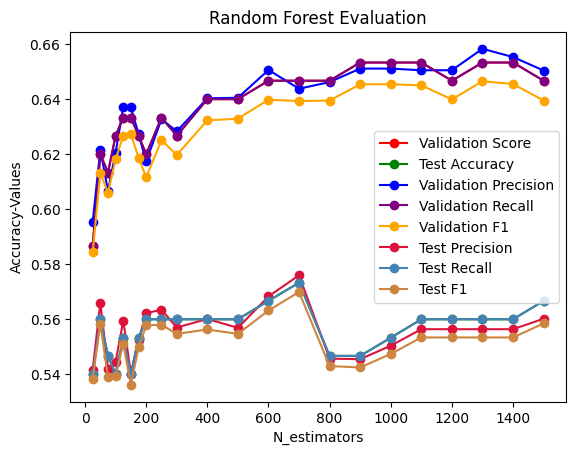

In [26]:
colors = ["red", "green", "blue", "purple", "orange", "crimson", "steelblue", "peru"]
for i, (key, value) in enumerate(yValues.items()):
    print(f"{key}:")
    print(value)
    plt.plot(estimators, value, linestyle='-', marker='o', color=colors[i], label=f"{key}" )

    

plt.xlabel('N_estimators')
plt.ylabel('Accuracy-Values')
plt.title('Random Forest Evaluation')
plt.legend()
plt.show()

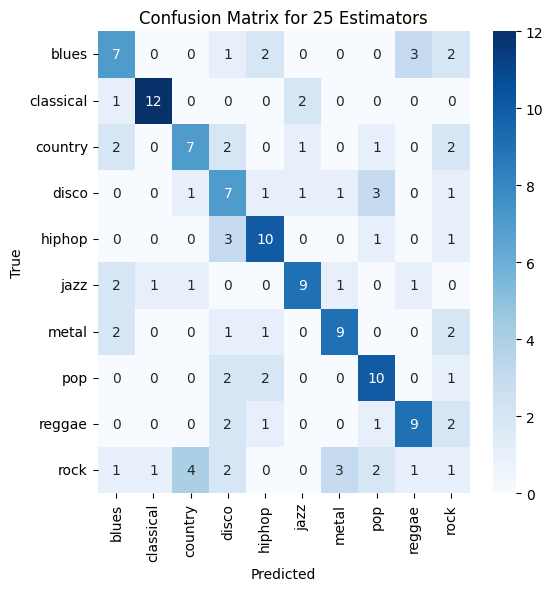

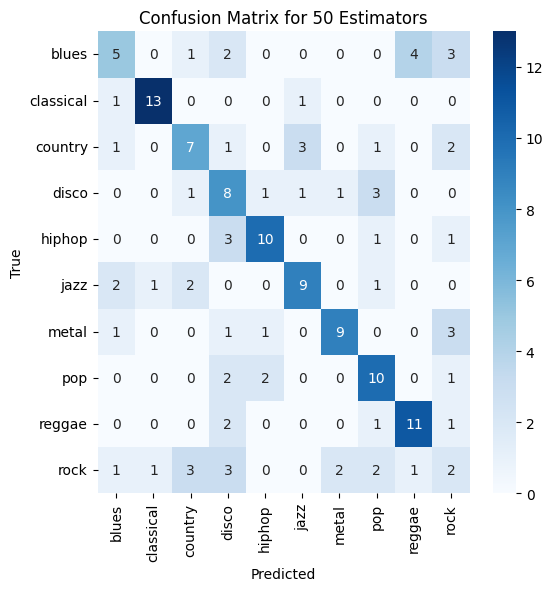

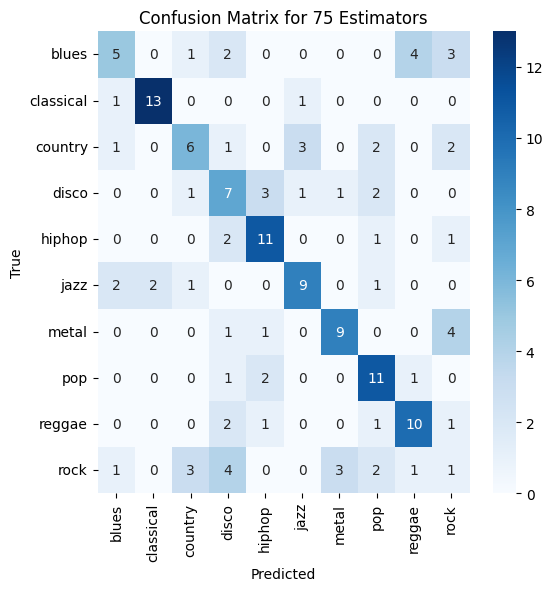

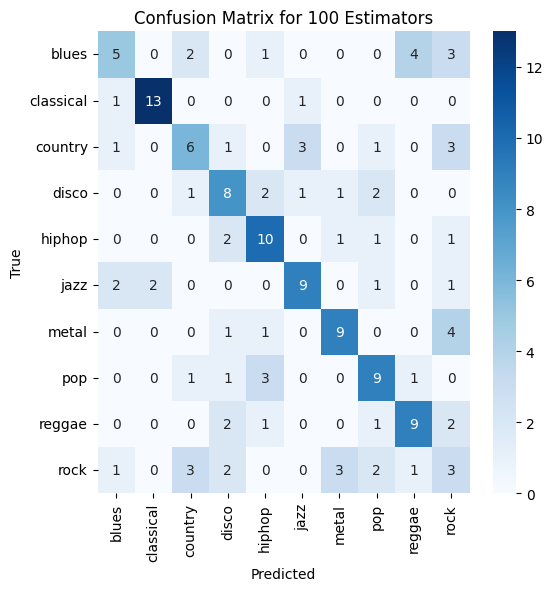

In [36]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# For each model, plot the confusion matrix for test data
for x in estimators[0:4]:
    metrics = RandomForestModel(x)
    yTestPred = RandomForestClassifier(n_estimators=x, random_state=42).fit(X_train, y_train).predict(X_test)
    plot_confusion_matrix(y_test, yTestPred, title=f'Confusion Matrix for {x} Estimators')

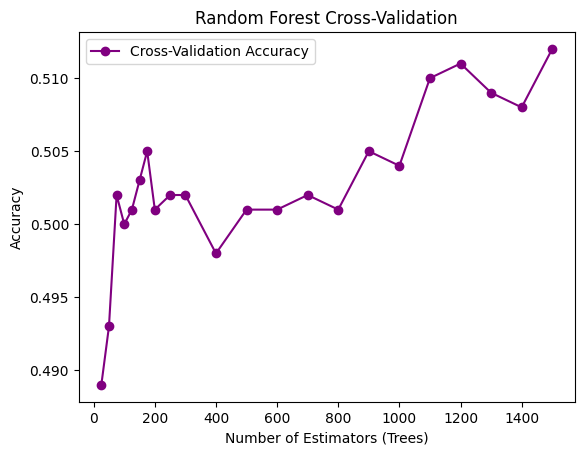

In [ ]:
def cross_validate_rf(n: int):
    randomForest = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(randomForest, X, y, cv=5)
    return cv_scores.mean()

cross_val_accuracies = [cross_validate_rf(x) for x in estimators]

plt.plot(estimators, cross_val_accuracies, linestyle='-', marker='o', color='purple', label='Cross-Validation Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Random Forest Cross-Validation')
plt.legend()
plt.show()